# **Milestone 2**

**Nama:** Kamelia Ramandha  
**Batch:** CODA-RMT-010  

Program ini dibuat untuk melakukan **analisis deskriptif dan inferensial** terhadap data *Employee Attrition* dengan tujuan untuk **mengidentifikasi faktor-faktor yang memengaruhi keputusan karyawan untuk keluar dari perusahaan**.  

Melalui analisis ini, diharapkan dapat diperoleh **insight yang membantu perusahaan dalam menekan tingkat attrition** serta meningkatkan **kepuasan dan retensi karyawan**.


## Problem Identification

In 2023, **Company A** faced a relatively high rate of employee attrition. This condition led to an increase in overall staff costs due to higher hiring expenses and declining organizational productivity. To address this issue, the CEO assigned the **HR Analytics team** to conduct an in-depth analysis to identify the causes of attrition and understand the demographic profile of employees who decided to leave.

The objective of this project is to **identify the factors influencing employee attrition** and to **map out the characteristics of employees who are more likely to leave** Company A during the year 2023.

More specifically, this analysis aims to answer the following research questions:
1. What are the key demographic characteristics (Age, Monthly Income, Total Working Years, Years at Company, Performance Rating) of employees who left compared to those who stayed?  
2. How is the attrition rate distributed across different departments?  
3. What are the differences in attrition patterns based on gender?  
4. Do employees who work overtime tend to have a higher likelihood of attrition compared to those who do not?  
5. Does the distance from home influence employees’ decisions to leave the company?  
6. Can Job Satisfaction predict Attrition? (using Logistic Regression analysis)


## Data Loading

In [31]:
# Mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [32]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [33]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data Cleaning

In [35]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Tidak ditemukannya data yang null

In [36]:
df.duplicated().sum()

np.int64(0)

Tidak ditemukannya data yang duplikat

In [37]:
# Melihat kolom yang tersedia untuk membuang kolom yang tidak digunakan
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Department, Overtime, Attrition, DistanceFromHome, Gender, Age, MonthlyIncome, TotalWorkingYears, YearsAt Company, JobSatisfaction

In [38]:
df = df.drop(columns=['BusinessTravel', 'DailyRate', 'Education', 'EducationField', 'EmployeeCount', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'EnvironmentSatisfaction',
       'Over18', 'PercentSalaryHike', 
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'])

In [39]:
df

,Age,Attrition,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,YearsAtCompany
0,41,Yes,Sales,1,1,Female,4,5993,Yes,3,8,6
1,49,No,Research & Development,8,2,Male,2,5130,No,4,10,10
2,37,Yes,Research & Development,2,4,Male,3,2090,Yes,3,7,0
3,33,No,Research & Development,3,5,Female,3,2909,Yes,3,8,8
4,27,No,Research & Development,2,7,Male,2,3468,No,3,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2061,Male,4,2571,No,3,17,5
1466,39,No,Research & Development,6,2062,Male,1,9991,No,3,9,7
1467,27,No,Research & Development,4,2064,Male,2,6142,Yes,4,6,6
1468,49,No,Sales,2,2065,Male,2,5390,No,3,17,9


## Analysis and Calculation

### Simple Analysis

In [40]:
attr = df[df['Attrition'] == 'Yes'].shape[0]
employee_count = df['Attrition'].shape[0]
attr_rate = round(((attr / employee_count) * 100), 2)

print(f"Attrition Rate: {attr_rate}%")

Attrition Rate: 16.12%


The common desired attrition rate within a company is > 10%. Thus this can be considered as higher than average.

### Bagaimana distribusi tingkat attrition berdasarkan Department?

In [41]:
attr_count_dept = df.groupby('Department')['Attrition'].value_counts()
print(attr_count_dept)


Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: count, dtype: int64


<Axes: xlabel='Department,Attrition'>

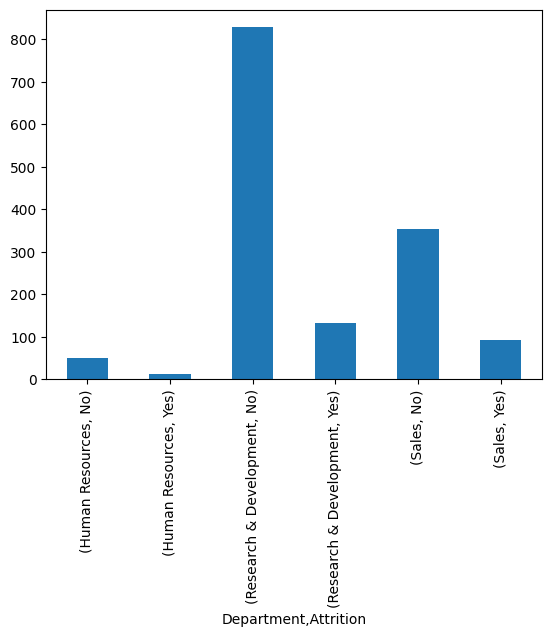

In [42]:
attr_count_dept.plot(kind='bar')

We can see that the higest attrition coming from Research & Development departement. But this doesn't indicate that they have the highest attrition rate.

In [43]:
total_per_dept = df.groupby('Department')['Attrition'].count()

yes_per_dept = df[df['Attrition'] == 'Yes'].groupby('Department')['Attrition'].count()

attr_rate_dept = (yes_per_dept / total_per_dept) * 100
attr_rate_dept = attr_rate_dept.round(2)   # bulatkan 2 angka di belakang koma
print(attr_rate)


16.12


<Axes: xlabel='Department'>

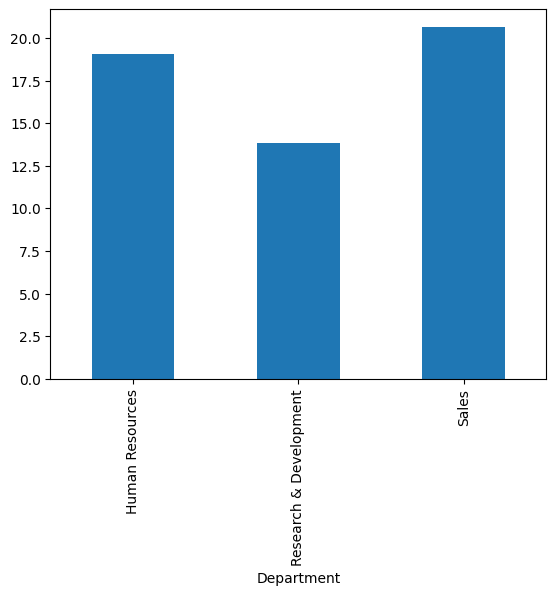

In [44]:
attr_rate_dept.plot(kind='bar')

If seen by rate, the department who has the highest attrition rate is Sales department

### Apakah karyawan yang bekerja OverTime memiliki kecenderungan lebih tinggi untuk mengalami attrition dibandingkan yang tidak?

In [45]:
attr_count = df.groupby('OverTime')['Attrition'].value_counts()
print(attr_count)


OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
Name: count, dtype: int64


<Axes: xlabel='OverTime,Attrition'>

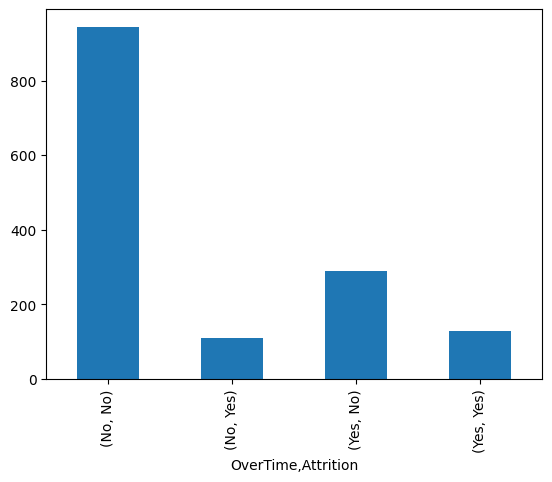

In [22]:
attr_count.plot(kind='bar')

If we see it only from the chart, we can see that people who quits some of them do overtime and some didn't. We couldn't really pull much information from this table. 

It would be better if we see the correlation between these two variables. Since both are categorical variables, we can use Chi-Square Test of Independence.

In [46]:
contingency_table = pd.crosstab(df['Attrition'],df['OverTime'])
contingency_table

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


In [48]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 8.15842372153832e-21


Since the p-value is greater than 0.05, this means that there are no correlation between Attrition and Overtime.

### Apakah faktor DistanceFromHome berpengaruh terhadap keputusan karyawan untuk keluar?

In [49]:
distance_mean = df.groupby('Attrition')['DistanceFromHome'].mean()

print(distance_mean)


Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64


We can see here that people who left the company has higher distance from home if compared to people who stay. We can check further the whether the difference is significant or not using T-Test.

In [50]:
from scipy.stats import ttest_ind

left = df[df['Attrition'] == 'Yes']['DistanceFromHome']
stay = df[df['Attrition'] == 'No']['DistanceFromHome']

t_stat, p = ttest_ind(left, stay, equal_var=False) 
print(f'Avg Distance of People Leave: {left.mean()}')
print(f'Avg Distance of People Stay: {stay.mean()}')
print("t-statistic:", t_stat)
print("p-value:", p)

Avg Distance of People Leave: 10.632911392405063
Avg Distance of People Stay: 8.915652879156529
t-statistic: 2.888183062817627
p-value: 0.004136511971511407


From the result, we can conclude that employees who live farther from the office are more likely to leave the company. The difference is statistically significant, meaning distance from home affects attrition.

### Bagaimana perbedaan pola attrition berdasarkan Gender?

In [51]:
gender_diff = df.groupby('Gender')['Attrition'].value_counts()

print(gender_diff)


Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: count, dtype: int64


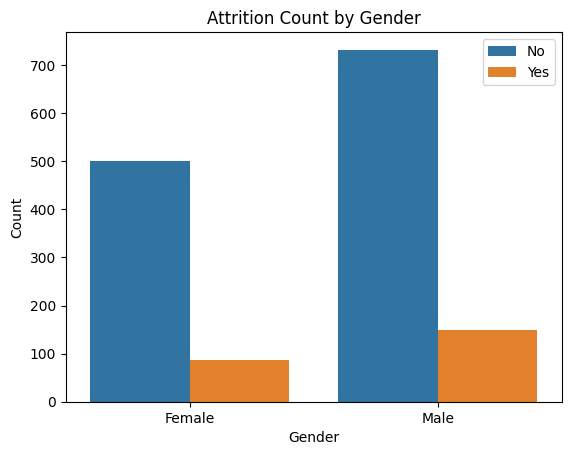

In [54]:
# Count how many Yes/No attrition per gender
gender_attr = df.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')

# Plot
sns.barplot(data=gender_attr, x='Gender', y='Count', hue='Attrition')
plt.title("Attrition Count by Gender")
plt.legend(bbox_to_anchor=(1,1))
plt.show()


We can see from the chart that there are more male who left the company

### Apa saja karakteristik demografi utama (Age, MonthlyIncome, PerformanceRating) dari karyawan yang keluar?

In [67]:
max_age_attr = df[df['Attrition'] == 'Yes']['Age'].max()
min_age_attr = df[df['Attrition'] == 'Yes']['Age'].min()
mode_age_attr = df[df['Attrition'] == 'Yes']['Age'].agg(lambda x: x.mode()[0])
mean_age_attr = df[df['Attrition'] == 'Yes']['Age'].mean().round(2)
std_age_attr = df[df['Attrition'] == 'Yes']['Age'].std()

print(f'Max Age for Attrition: {max_age_attr}')
print(f'Min Age for Attrition: {min_age_attr}')
print(f'Mode Age for Attrition: {mode_age_attr}')
print(f'Mean Age for Attrition: {mean_age_attr}')
print(f'SDT Age for Attrition: {std_age_attr}')

Max Age for Attrition: 58
Min Age for Attrition: 18
Mode Age for Attrition: 29
Mean Age for Attrition: 33.61
SDT Age for Attrition: 9.689349895351622


Employees who left the company range in age from 18 to 58 years old, with an average age of 33.6 years. The most common age among those who left is 29, and the age variation is about ±9.7 years, indicating a fairly diverse age group within attrition cases.

<Axes: ylabel='Frequency'>

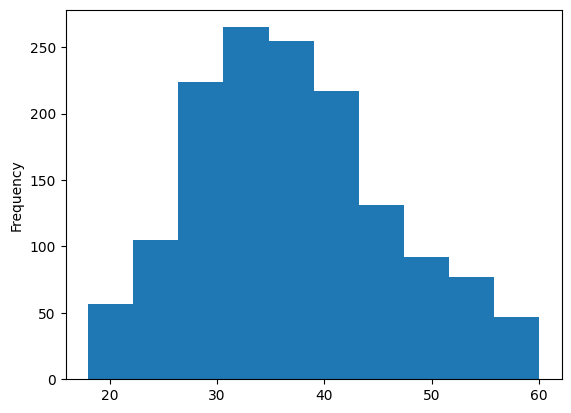

In [69]:
df['Age'].plot(kind='hist')

Most employees who left are in their 30s to early 40s, while fewer younger (under 25) and older (above 50) employees experienced attrition. This suggests that mid-career employees are more likely to leave, potentially due to limited career progression opportunities or a shift in priorities toward better work–life balance.

In [70]:
max_age_attr = df[df['Attrition'] == 'Yes']['MonthlyIncome'].max()
min_age_attr = df[df['Attrition'] == 'Yes']['MonthlyIncome'].min()
mode_age_attr = df[df['Attrition'] == 'Yes']['MonthlyIncome'].agg(lambda x: x.mode()[0])
mean_age_attr = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean().round(2)
std_age_attr = df[df['Attrition'] == 'Yes']['MonthlyIncome'].std()

print(f'Max Income for Attrition: {max_age_attr}')
print(f'Min Income for Attrition: {min_age_attr}')
print(f'Mode Income for Attrition: {mode_age_attr}')
print(f'Mean Income for Attrition: {mean_age_attr}')
print(f'SDT Income for Attrition: {std_age_attr}')

Max Income for Attrition: 19859
Min Income for Attrition: 1009
Mode Income for Attrition: 2293
Mean Income for Attrition: 4787.09
SDT Income for Attrition: 3640.2103671038512


Employees who left the company earned between $1,009 and $19,859, with an average income of about $4,787. The most common income among those who left is $2,293, and the income variation is quite large (SD = 3,640), indicating that attrition occurred across different income levels — though more common among lower- to mid-income employees.

<Axes: ylabel='Frequency'>

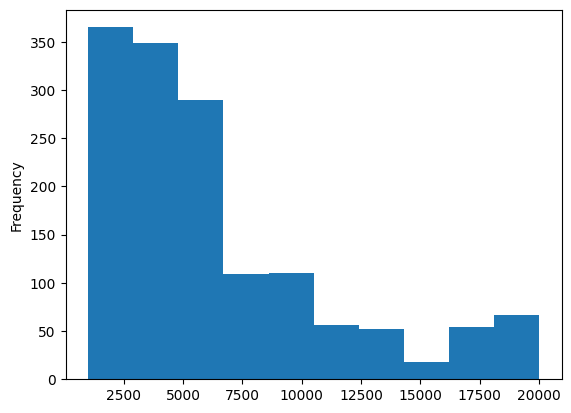

In [71]:
df['MonthlyIncome'].plot(kind='hist')

The distribution of monthly income is right-skewed, meaning most employees earn on the lower end (below $5,000), while only a few have very high salaries. Combined with earlier stats, this suggests that attrition is more common among lower- to mid-income employees, possibly due to compensation dissatisfaction or limited financial growth opportunities.

In [76]:
max_perf_attr = df[df['Attrition'] == 'Yes']['PerformanceRating'].max()
min_perf_attr = df[df['Attrition'] == 'Yes']['PerformanceRating'].min()
mode_perf_attr = df[df['Attrition'] == 'Yes']['PerformanceRating'].agg(lambda x: x.mode()[0])
mean_perf_attr = df[df['Attrition'] == 'Yes']['PerformanceRating'].mean().round(2)
std_perf_attr = df[df['Attrition'] == 'Yes']['PerformanceRating'].std()

print(f'Max Performance Score for Attrition: {max_perf_attr}')
print(f'Min Performance Score for Attrition: {min_perf_attr}')
print(f'Mode Performance Score for Attrition: {mode_perf_attr}')
print(f'Mean Performance Score for Attrition: {mean_perf_attr}')
print(f'SDT Performance Score for Attrition: {std_perf_attr}')

Max Performance Score for Attrition: 4
Min Performance Score for Attrition: 3
Mode Performance Score for Attrition: 3
Mean Performance Score for Attrition: 3.16
SDT Performance Score for Attrition: 0.3637354964898372


Employees who left the company had performance scores ranging from 3 to 4, with an average score of 3.16. The most common score among those who left is 3, and the variation is small (SD = 0.36).

This suggests that most employees who left were not low performers, indicating that attrition may not be driven by poor performance, but possibly by other factors like career growth or engagement.

<Axes: ylabel='Frequency'>

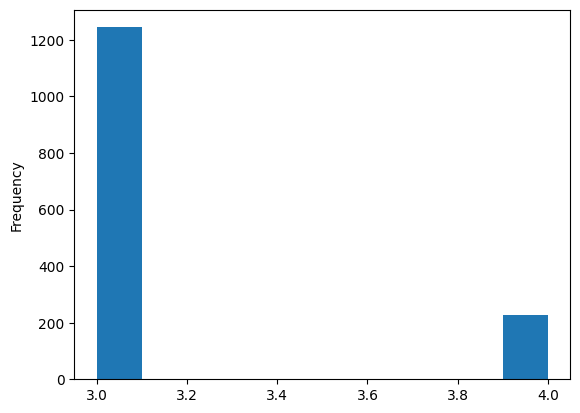

In [73]:
df['PerformanceRating'].plot(kind='hist')

Most employees who left had a performance score of 3, with very few rated 4.

This indicates that attrition is not concentrated among low performers but rather among those performing at an average or slightly above-average level.

### Apakah terdapat hubungan yang signifikan secara statistik antara JobSatisfaction dan Attrition (melalui uji Logistic Regression)?

In [75]:
import statsmodels.api as sm

# Encode Attrition to numeric
df['Attrition_num'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Add constant
X = sm.add_constant(df['JobSatisfaction'])
y = df['Attrition_num']

# Fit logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.436413
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Attrition_num   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Oct 2025   Pseudo R-squ.:                 0.01196
Time:                        14:57:07   Log-Likelihood:                -641.53
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.127e-05
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9904      0.176     -5.635      0.000      -1.335      -0.646
JobSatisfactio

A logistic regression analysis showed that Job Satisfaction significantly predicts Attrition (p < 0.001). The negative coefficient (-0.25) indicates that employees with higher job satisfaction are less likely to leave the company.

This finding highlights the importance of monitoring engagement or satisfaction scores, when these scores decline, it may serve as an early warning signal for potential turnover within teams.